
# Random Walk Model

In [6]:
import pandas as pd
import numpy as np
import random

from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    

## Generate Random Walk Data

In [9]:
def generate_random_walk(length = 1000, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i - 1] + e)
    return ts

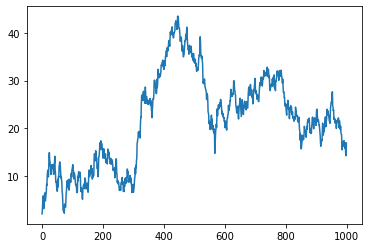

In [10]:
data = generate_random_walk(1000)
plt.plot(data)
plt.show()


## ACF and PACF Analysis

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


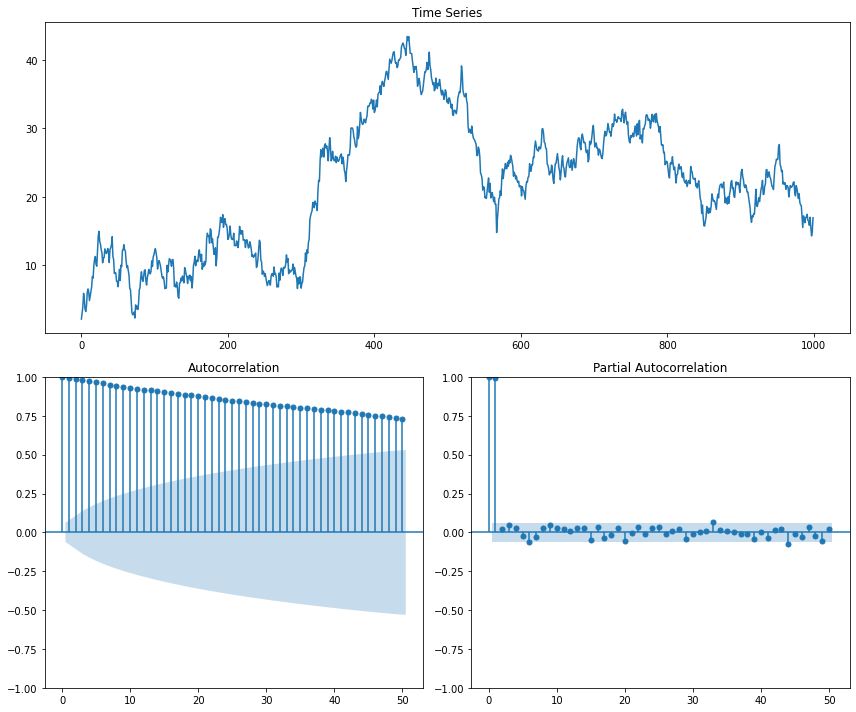

In [11]:
plotds(data)

## AR Analysis

In [12]:
model = ARIMA(data, order=(1, 0, 0))
trained_model = model.fit()
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1425.728
Date:                Fri, 24 Jun 2022   AIC                           2857.455
Time:                        16:56:20   BIC                           2872.178
Sample:                             0   HQIC                          2863.051
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9850      4.891      3.677      0.000       8.398      27.572
ar.L1          0.9954      0.003    333.149      0.000       0.990       1.001
sigma2         1.0089      0.041     24.521      0.000       0.928       1.090
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.40   Prob(JB):                         0.03
Heteroskedasticity (H):               0.74   Skew:                             0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Generate Guaasian White Noise

In [15]:
def generate_white_noise(length = 1000, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        ts.append(e)
    return ts

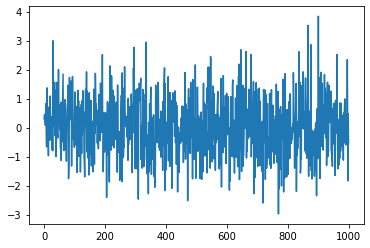

In [16]:
data = generate_white_noise(1000)
plt.plot(data)
plt.show()

## ACF and PACF Analysis

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


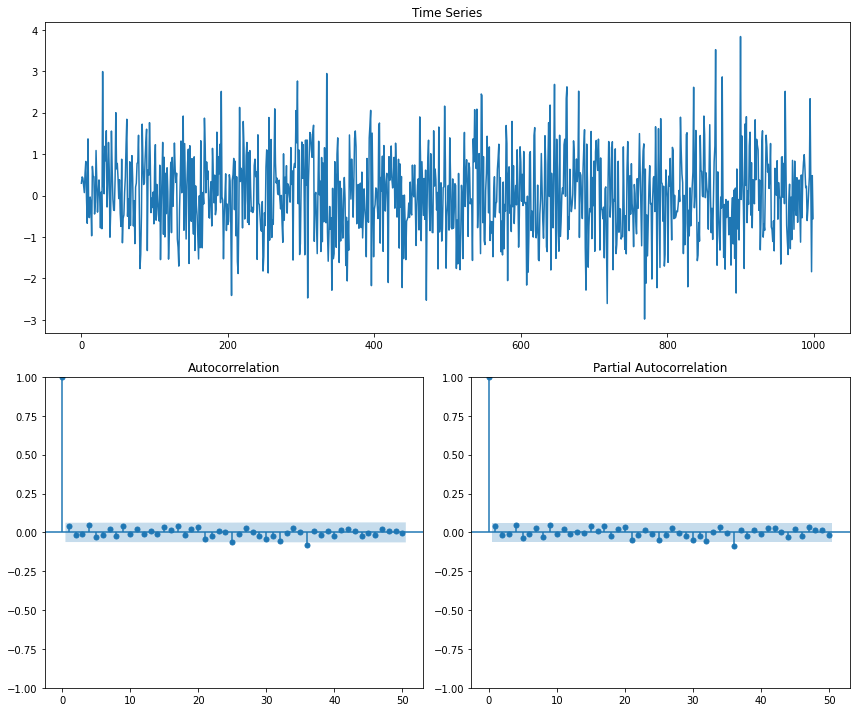

In [17]:
plotds(data)